In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('instagrampost-labeling.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df = df.dropna()
df

Steming    Label
0    ugm metaverse minecraft challenge hai sobat mi...  Positif
1    looking at the challenge or trouble not sure l...  Negatif
2    hello sobat online kenal fatmawati universitas...  Positif
3    msib mari ajar holaaa everyone tesalonika univ...  Positif
4    halo generasi muda indonesia kenal himmatuz za...  Positif
..                                                 ...      ...
176  terima kasih sempat program studi independent ...  Positif
177  agustus kemerdakaan nkri identik riah raya mer...  Positif
178  hai magangers bingung studi independen galau p...  Positif
179  mt school parsial agenda upgrading trainer lea...  Positif
180  ayo ikut kontes foto agustus kemerdakaan nkri ...  Positif

[181 rows x 2 columns]

In [3]:
pd.value_counts(df['Label'])

C:\Users\Laurence Nicholas S\AppData\Local\Temp\ipykernel_12192\626637336.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Label'])


Label
Positif    165
Netral      12
Negatif      4
Name: count, dtype: int64

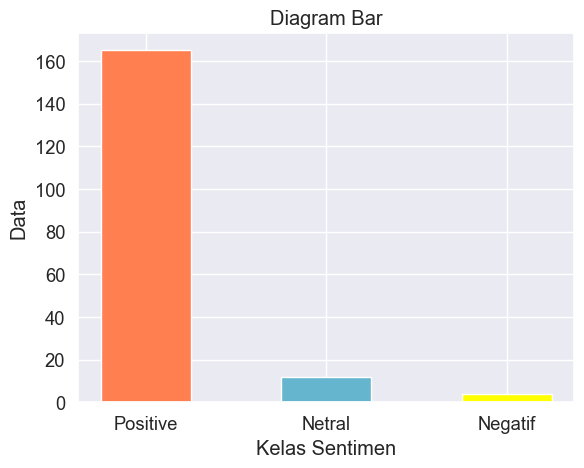

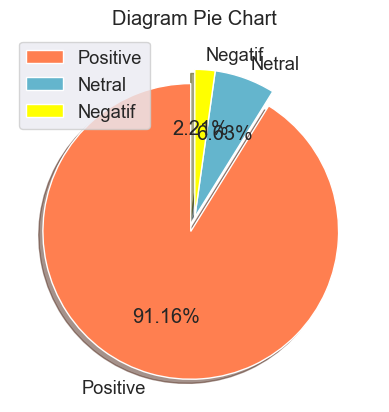

In [4]:
labels = ['Positive','Netral','Negatif']
Category2 = [165,12,4]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['coral', 'c','yellow'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar')
plt.show()

#pie chart
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

In [5]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.4, random_state = 1)

In [6]:
# Membuat data frame dari hasil split
df_train60 = pd.DataFrame()
df_train60['Steming'] = train_X
df_train60['Label'] = train_Y

df_test40 = pd.DataFrame()
df_test40['Steming'] = test_X
df_test40['Label'] = test_Y

In [7]:
#Data frame train hasil pembagian
df_train60

Steming    Label
169  alhamdulillah lulus uji sertifikasi internasio...  Positif
164  studi independen kampus merdeka microsoft mari...  Positif
175  halo dwi lakshono salah serta magang studi ind...  Positif
178  hai magangers bingung studi independen galau p...  Positif
159  hallo kenal rahmad jaya harefa mahasiswa unive...  Positif
..                                                 ...      ...
133  hi eka salah mahasiswa jurus akuntansi ikut pr...  Positif
137  halo kenal fitri khumaeroh salah serta program...  Positif
72   hai sobat jitu terima sertifikat program kampu...  Positif
140  hello my name is muhammad zaynurroyhan im an i...  Positif
37   assalamualaikum wr wb giat studi independen ma...  Positif

[108 rows x 2 columns]

In [8]:
#Data Frame test Hasil Pembagian
df_test40

Steming    Label
117  assalamualaikum halo jody irawan politeknik ma...  Positif
93   hallo samuel parlindungsn matematika universit...  Positif
113  hii hormat salah serta studi independen kampus...  Positif
162  cuplik video ikut program studi independen kam...   Netral
35   hallo hafiz serta studi independen learning tr...  Positif
..                                                 ...      ...
127  hi im nafiul huda student of universitas brawi...  Positif
45   sneak peek sosialisasi program studi independe...   Netral
78   hallo ahmad figo alfarqi jurus teknik informat...  Positif
36   studi independen cycle maribelajar microsoft h...  Positif
174  trianto haryo nugroho mahasiswa ilmu aktuaria ...  Positif

[73 rows x 2 columns]

In [9]:
df_test40.to_csv('instagrampost-test40.csv')

In [10]:
df_train60.to_csv('instagrampost-train60.csv')

In [11]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_6040 = TfidfVectorizer()
tfidf_vect_6040.fit(df['Steming'])
train_X_tfidf_6040 = tfidf_vect_6040.transform(df_train60['Steming'])
test_X_tfidf_6040 = tfidf_vect_6040.transform(df_test40['Steming'])

In [12]:
#melihat hasil pembobotan TF-IDF pada data train
print(train_X_tfidf_6040)

  (0, 2319)	0.2076487307836633
  (0, 2289)	0.2933092347135447
  (0, 2210)	0.13001560376531862
  (0, 2196)	0.10884937973677629
  (0, 2099)	0.06423026125176018
  (0, 1988)	0.32663617846071535
  (0, 1690)	0.14097184542080443
  (0, 1673)	0.16331808923035768
  (0, 1670)	0.256417263718191
  (0, 1550)	0.2195252927228373
  (0, 1433)	0.3415135195766192
  (0, 1405)	0.08149520118045286
  (0, 1400)	0.10484569862502956
  (0, 1396)	0.2081597488509015
  (0, 1333)	0.15098071174067257
  (0, 1293)	0.4390505854456746
  (0, 1088)	0.14574135073213
  (0, 1079)	0.10968756814002957
  (0, 1002)	0.18974037835533217
  (0, 949)	0.07364719713011018
  (0, 924)	0.1150143964872446
  (0, 737)	0.1681599587453577
  (0, 187)	0.14917634017833517
  (0, 83)	0.19794487311286288
  (1, 2390)	0.1631829143515686
  :	:
  (106, 125)	0.27164003024090194
  (106, 113)	0.055570895794437906
  (106, 96)	0.1321116119755267
  (106, 5)	0.16971105975329062
  (107, 2450)	0.2462373890175351
  (107, 2403)	0.2462373890175351
  (107, 2186)	0.265

In [13]:
#melihat hasil pembobotan TF-IDF pada data test
print(test_X_tfidf_6040)

  (0, 2463)	0.05727003596862937
  (0, 2401)	0.07869119295594132
  (0, 2334)	0.03569882678844954
  (0, 2331)	0.11393678786006188
  (0, 2328)	0.10555381385164335
  (0, 2280)	0.10555381385164335
  (0, 2273)	0.06911254647542714
  (0, 2236)	0.06012628838981173
  (0, 2211)	0.1660806644131347
  (0, 2196)	0.08456568849515116
  (0, 2189)	0.05727003596862937
  (0, 2188)	0.11393678786006188
  (0, 2168)	0.10555381385164335
  (0, 2159)	0.06012628838981173
  (0, 2114)	0.08803596632548885
  (0, 2099)	0.04990084719006774
  (0, 2056)	0.09122302512914608
  (0, 2029)	0.08284005112072754
  (0, 2003)	0.19921199827512923
  (0, 1989)	0.03666062614957853
  (0, 1988)	0.06344136591717965
  (0, 1971)	0.11393678786006188
  (0, 1958)	0.06633093818090326
  (0, 1942)	0.07869119295594132
  (0, 1893)	0.11393678786006188
  :	:
  (72, 737)	0.21756625498151252
  (72, 571)	0.0736420033581981
  (72, 565)	0.11058467623328472
  (72, 564)	0.12649501943315833
  (72, 518)	0.10127772208775482
  (72, 490)	0.23325119752624035
  (7

In [14]:
print(train_X_tfidf_6040.shape)
print(test_X_tfidf_6040.shape)

(108, 2497)
(73, 2497)


In [15]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_6040.vocabulary_)

{'ugm': 2317, 'metaverse': 1403, 'minecraft': 1415, 'challenge': 404, 'hai': 810, 'sobat': 2052, 'microsoft': 1405, 'rangka': 1794, 'dies': 535, 'natalis': 1487, 'selenggara': 1958, 'kompetisi': 1156, 'nama': 1481, 'giat': 768, 'ikut': 920, 'siswa': 2035, 'smasederajat': 2049, 'mahasiswa': 1308, 'guru': 799, 'syarat': 2139, 'tentu': 2205, 'gambar': 752, 'slide': 2047, 'iya': 1026, 'daftar': 475, 'karya': 1087, 'bitlyugmmetaverse': 330, 'ayo': 222, 'ajak': 55, 'temantemanmu': 2197, 'raih': 1785, 'hadiah': 807, 'total': 2272, 'rp': 1870, 'tunggu': 2302, 'looking': 1281, 'at': 203, 'the': 2224, 'or': 1564, 'trouble': 2288, 'not': 1524, 'sure': 2127, 'lets': 1253, 'gooo': 783, 'sedia': 1941, 'to': 2257, 'spend': 2074, 'all': 89, 'of': 1541, 'my': 1474, 'gabut': 744, 'day': 493, 'and': 125, 'time': 2250, 'fix': 709, 'this': 2236, 'see': 1942, 'hello': 853, 'online': 1555, 'kenal': 1116, 'fatmawati': 678, 'universitas': 2334, 'negeri': 1495, 'makassar': 1318, 'senang': 1974, 'studiproyek': 2

In [16]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear',
            decision_function_shape='ovr',
           C=1.0)
clf = model.fit(train_X_tfidf_6040,train_Y)

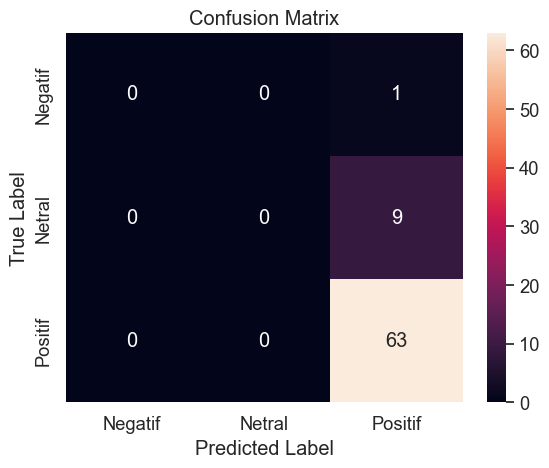

In [17]:
# Proses Pengujian
predictions_SVM_6040 = clf.predict(test_X_tfidf_6040)

#simpan data frame
test_prediction_6040 = pd.DataFrame()
test_prediction_6040['Text'] = test_X
test_prediction_6040['Label'] = predictions_SVM_6040

test_prediction_6040.to_csv('instagramcom-post_prediction_6040.csv')

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_6040), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM_6040))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_6040))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_6040, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_6040, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_6040, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         1
      Netral       0.00      0.00      0.00         9
     Positif       0.86      1.00      0.93        63

    accuracy                           0.86        73
   macro avg       0.29      0.33      0.31        73
weighted avg       0.74      0.86      0.80        73

Accuracy of the model :  0.863013698630137
Precision of the model:  0.2876712328767123
Recall of the model:  0.3333333333333333
F1-score of the model:  0.3088235294117647


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [19]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_X_tfidf_6040,train_Y)
predictions= clf.predict(test_X_tfidf_6040)

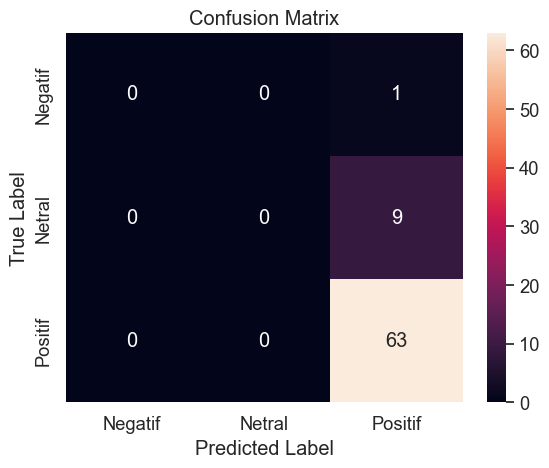

In [20]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report


print (classification_report(test_Y, predictions))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions))
print('Precision of the model: ', precision_score(test_Y, predictions, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         1
      Netral       0.00      0.00      0.00         9
     Positif       0.86      1.00      0.93        63

    accuracy                           0.86        73
   macro avg       0.29      0.33      0.31        73
weighted avg       0.74      0.86      0.80        73

Accuracy of the model :  0.863013698630137
Precision of the model:  0.2876712328767123
Recall of the model:  0.3333333333333333
F1-score of the model:  0.3088235294117647


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c